In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('amazon_alexa.tsv',sep='\t')

In [17]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [41]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [49]:
df = df[df['verified_reviews'].notna()]

#### Analyzing rating column

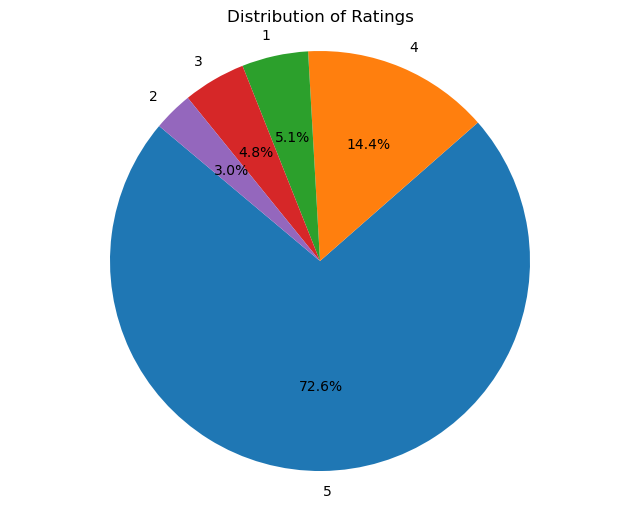

In [23]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ratings')
plt.show()

In [25]:
df['date'].nunique()

77

In [27]:
df.shape

(3150, 5)

#### Analyzing variation column

In [29]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

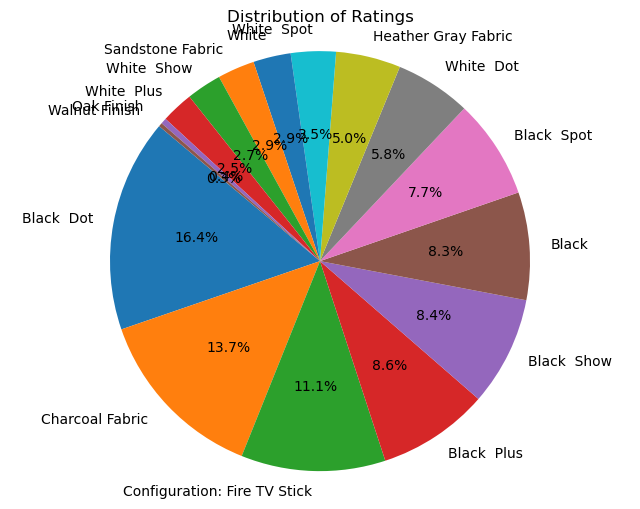

In [31]:
variation_counts = df['variation'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(variation_counts, labels=variation_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ratings')
plt.show()

In [33]:
variation_counts.index

Index(['Black  Dot', 'Charcoal Fabric ', 'Configuration: Fire TV Stick',
       'Black  Plus', 'Black  Show', 'Black', 'Black  Spot', 'White  Dot',
       'Heather Gray Fabric ', 'White  Spot', 'White', 'Sandstone Fabric ',
       'White  Show', 'White  Plus', 'Oak Finish ', 'Walnut Finish '],
      dtype='object', name='variation')

In [35]:
df['feedback'].unique()

array([1, 0], dtype=int64)

In [39]:
df[df['feedback'] == 0].shape

(257, 5)

In [51]:
df['length'] = df['verified_reviews'].apply(len)

C:\Users\ramac\AppData\Local\Temp\ipykernel_16604\1219951951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['verified_reviews'].apply(len)


In [55]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [60]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [64]:
(2286+455+152)/(2286+455+161+152+95)*100

91.87043505874881

#### 91% has +ve reviews

#### 9% has -ve reviews

In [68]:
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

<BarContainer object of 16 artists>

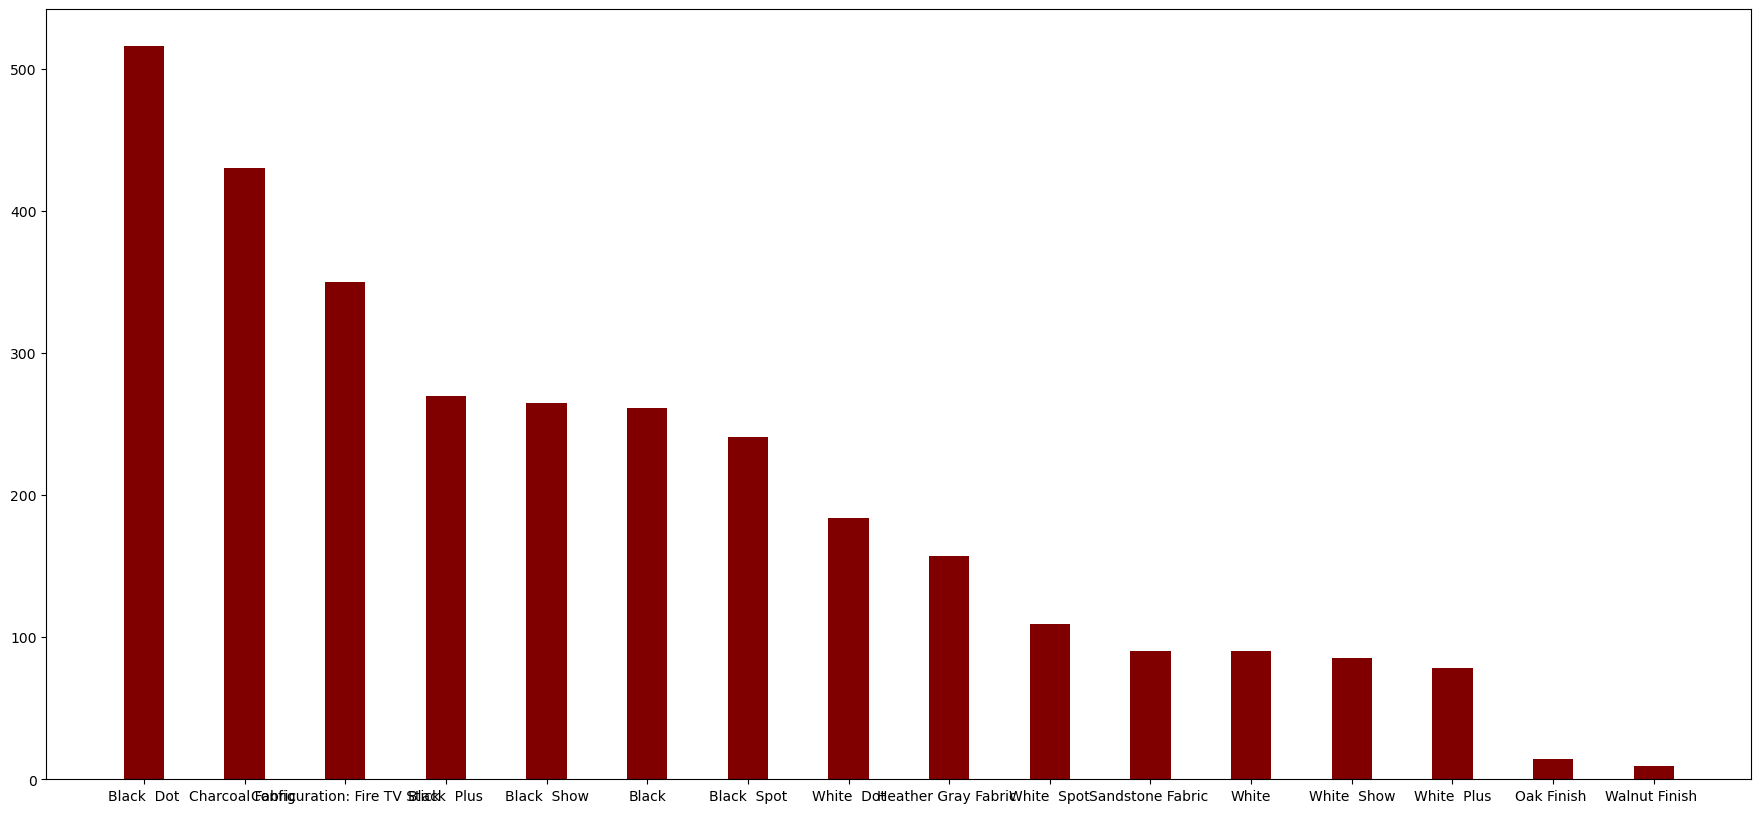

In [82]:
variation_counts = df['variation'].value_counts()

# Create the bar chart
plt.figure(figsize=(22, 10))
plt.bar(variation_counts.index, variation_counts.values, color='maroon', width=0.4)